### Importar Bibliotecas para Análise dos Dados


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import pickle
%matplotlib inline
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

#### Ler-se os datasets

In [6]:
df_train = pd.read_csv('./Input/training.csv',sep=';')
df_test = pd.read_csv('./Input/test.csv',sep=';')

#### Informações sobre o dataset

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   age                     32561 non-null  int64 
 1    workclass              32561 non-null  object
 2    fnlwgt                 32561 non-null  int64 
 3    education              32561 non-null  object
 4    education-num          32561 non-null  int64 
 5    marital-status         32561 non-null  object
 6    occupation             32561 non-null  object
 7    relationship           32561 non-null  object
 8    race                   32561 non-null  object
 9    sex                    32561 non-null  object
 10   capital-gain           32561 non-null  int64 
 11   capital-loss           32561 non-null  int64 
 12   hours-per-week         32561 non-null  int64 
 13   native-country         32561 non-null  object
 14   salary-classification  32561 non-null  object
dtypes:

#### Breve descrição do dataset, porém traz conhecimento de features que são do tipo númerico

In [8]:
df_train.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


##### Informações sobre as features do tipo objeto

In [9]:
df_train.describe(include=[object])

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,salary-classification
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


##### Verificar nome das colunas 

In [10]:
df_train.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' salary-classification'],
      dtype='object')

### Observação problema com Space
Foi observado que os nomes das colunas (features) estavam com espaçamento. E para garantir foi verificado e retirado os espaçamentos dos valores destas features.

In [11]:
def deleteSpaces(df):
    #deletar espaço no nome das colunas e mudança do nome da coluna alvo
    df.columns = ['age','workclass','fnlwgt','education','education_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','target']
    lista = ['workclass','education','marital_status','occupation','relationship','race','sex','native_country','target']
    for i in lista:
        df[i] = df[i].str.strip()

In [12]:
deleteSpaces(df_train)
deleteSpaces(df_test)

#### Os missing values
Usando a função **.info()** acima retornou que não há missing values. No entanto, a descrição dada pelo dataset diz-nos que os missing values foram substituídos por **?**.

Desta forma, verificamos quantos missing values tem o dataset de treino e de teste: 

In [13]:
df_train.isin(['?']).sum(axis=0)

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
target               0
dtype: int64

In [14]:
df_test.isin(['?']).sum(axis=0)

age                 0
workclass         963
fnlwgt              0
education           0
education_num       0
marital_status      0
occupation        966
relationship        0
race                0
sex                 0
capital_gain        0
capital_loss        0
hours_per_week      0
native_country    274
target              0
dtype: int64

#### Decisão dos Missing Values
Depois de observar os missing values presentes tanto no dataset de treino como no dataset de teste, chegou-se a conclusão que a melhor decissão é deletar os registos os quais contenham missing values. Pois o país de origem, classe de trabalho e ocupação não temos como substituir por média ou generalização destes campos, presentes no datasets. Então foi feito os seguintes passos:

1. Foi substituído os valores de **?** por **NaN**;
2. Consequentemente foi deletado os registos (linhas) do dataset que continham valores **NaN**

In [15]:
def deleteMissingValues(df):
    df['occupation'] = df['occupation'].replace('?',np.nan)
    df['workclass'] = df['workclass'].replace('?',np.nan)
    df['native_country'] = df['native_country'].replace('?',np.nan)
    df.dropna(how ='any',inplace = True)

In [16]:
deleteMissingValues(df_train)
deleteMissingValues(df_test)

In [17]:
df_train.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
target            0
dtype: int64

## Feature Engineering

O processo de feature engineering, foi dada pela observação das features a qual fazemos um agrupamento de valores dos quais achamos pertinentes. De acordo com o estudo da analise dos dados, isto posto, fizemos os seguintes agrupamentos:

 **1. Por faixa etária de idade:**
 
  Como temos 42 paises e a legislação de cada um possui diferentes faixa etarias do que seria um jovem, adolescentes e idosos. Foi criada faixa etarias por decisão da equipa:

Dos 0 aos 25 young

Dos 26 aos 45 adult

Dos 46 aos 65 seniors

Maiores de 65 old
  
 **2. Por horas trabalho na semana:**
 
   O mesmo vale para criação do agrupamento desta feature, foi dividido da seguinte forma:
   
par-time (0-25)

full-time (25-40)

over-time (40-60)

Workaholic (60+).
   
 **3. Por status civil.**
 
   A criação dessa nova feature foi observando que na pratica tinhamos casados e solteiros  
   
   **Solteiro:** Divorced, Never-married, Separated, Widowed.
   
   **Casado:** Married-AF-spouse, Married-civ-spouse, Married-spouse-absent


In [18]:
def age_range(element):
    if element <= 25:
        return 'young'
    elif (element>25 and element <=45):
        return 'adult'
    elif (element>45 and element <=65):
        return 'seniors'
    else:
        return 'Old'
    
def work(element):
    if element <= 25:
        return 'part-time'
    elif (element>25 and element <=40):
        return 'full-time'
    elif (element>40 and element <=60):
        return 'over-time'
    else:
        return 'Workaholic'
    
def createFeature(df):
    target = df.target
    df = df.drop(columns=['target'])
    df['age_range'] = df['age'].apply(age_range)
    df['work'] = df['hours_per_week'].apply(work)
    df['status_civic'] = df['marital_status'].map({'Married-civ-spouse':'married',
                                                         'Never-married':'single',
                                                         'Divorced':'single',
                                                         'Separated':'single',
                                                         'Widowed':'single',
                                                         'Married-spouse-absent':'married',
                                                         'Married-AF-spouse':'married'})
     
    df['target'] = target
    return df

In [19]:
df_train = createFeature(df_train)
df_test = createFeature(df_test)

In [20]:
df_train.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,age_range,work,status_civic,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,adult,full-time,single,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,seniors,part-time,married,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,adult,full-time,single,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,seniors,full-time,married,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,adult,full-time,married,<=50K


## Visualizar informações sobre as features:

Foi necessário ter uma informação sobre cada feature de forma mais ampla. Descrito a seguir:

**1. feature**

Nome da feature em questão analisada.

**2. dtype**

Tipo dos registos desta feature.

**3. num_null**

Número de registos nulos desta feature.

**4. num_unique**

Quantos valores unicos possui esta feature.

**5. record per unique**

Numero de registos total por valores unicos.

In [21]:
def type_check(df):
    
    columns = df.columns
    list = []
    for feature in columns:
        dtype    = df[feature].dtypes
        num_null = df[feature].isnull().sum()
        num_unique = df[feature].nunique()
        num_reg_type = int(len(df)/df[feature].nunique())
        list.append([feature, dtype, num_null,num_unique, num_reg_type])
    
    df_checked = pd.DataFrame(list)
    df_checked.columns = ['feature','dtype','num_null','num_unique','record per unique']
    df_checked = df_checked.sort_values(by='dtype', axis=0, ascending=True)
    
    return df_checked

In [22]:
type_check(df_train)

,feature,dtype,num_null,num_unique,record per unique
0,age,int64,0,72,418
2,fnlwgt,int64,0,20263,1
4,education_num,int64,0,16,1885
12,hours_per_week,int64,0,94,320
11,capital_loss,int64,0,90,335
10,capital_gain,int64,0,118,255
15,work,object,0,4,7540
14,age_range,object,0,4,7540
13,native_country,object,0,41,735
8,race,object,0,5,6032


In [23]:
df_train['status_civic'].value_counts()

single     15706
married    14456
Name: status_civic, dtype: int64

##### Com base na tabela podemos chegar as seguintes analises e conclusões:

1. Temos **12 features** do tipo **objeto** e **6 features** do tipo **int64**;


2. A **feature education_num** e **education** ambas dizem respeito ao mesmo dado só que em tipos diferentes. 
Aqui precisaremos deletar uma delas. Acredito como iremos colocar o algoritmo em produção, devemos deletar a education_num;


3. A **feature fnlwgt** basicamente tem um único registo por valor único, logo ela não possui insinificância para o dataset, só irá introduzir ruído. Pois ela seria basicamente como um id para os registos. Logo é mais uma feature candidata a ser excluída;


4. Próximo passo seria fazer **label enconder** das **12 features** do tipo objeto para transformá-los no tipo int64.

### LabelEncoder das features

In [24]:
def transformType(df):
    labelenconder = LabelEncoder()
    # mudar tipo do valor da feature sexo
    df['sex'] = labelenconder.fit_transform(df['sex'])
    # mudar tipo do valor da feature raça
    df['race'] = labelenconder.fit_transform(df['race'])
    # mudar tipo do valor da feature conjugal
    df['marital_status'] = labelenconder.fit_transform(df['marital_status'])
    # mudar tipo do valor da feature relação
    df['relationship'] =  labelenconder.fit_transform(df['relationship'])
    # mudar tipo do valor da feature classe trabalhadora
    df['workclass'] = labelenconder.fit_transform(df['workclass'])
    # mudar tipo do valor da feature educação
    #df['education'] = labelenconder.fit_transform(df['education'])
    # mudar tipo do valor da feature  ocupação
    df['occupation'] = labelenconder.fit_transform(df['occupation'])
    # mudar tipo do valor da feature target
    df['target'] = labelenconder.fit_transform(df['target'])
    # mudar tipo do valor da feature nação de origem
    df['native_country'] = labelenconder.fit_transform(df['native_country'])
    # mudar tipo do valor da  feature criada status civiel ( solteiro ou casado)
    df['status_civic'] = labelenconder.fit_transform(df['status_civic'])
    # mudar tipo do valor da  feature criada sobre carga de trabalho work 
    df['work'] = labelenconder.fit_transform(df['work'])
    # mudar tipo do valor da  feature criada faixa etaria
    df['age_range'] = labelenconder.fit_transform(df['age_range'])
    
    #education
    df['education'] = df['education'].map({'Preschool':1,
                                           '1st-4th':2,
                                           '5th-6th': 3,
                                           'Doctorate':16,
                                           '12th':8,  
                                           '9th':5,
                                           'Prof-school':15,
                                           '7th-8th':4,
                                           '10th':6,
                                           'Assoc-acdm':12,
                                           '11th':7,
                                           'Assoc-voc':11,
                                           'Masters':14,
                                           'Bachelors':13,
                                           'Some-college':10,
                                           'HS-grad':9}).astype(int)
    

In [25]:
transformType(df_train)
transformType(df_test)
type_check(df_train)

,feature,dtype,num_null,num_unique,record per unique
0,age,int64,0,72,418
15,work,int64,0,4,7540
14,age_range,int64,0,4,7540
13,native_country,int64,0,41,735
12,hours_per_week,int64,0,94,320
11,capital_loss,int64,0,90,335
10,capital_gain,int64,0,118,255
9,sex,int64,0,2,15081
8,race,int64,0,5,6032
7,relationship,int64,0,6,5027


In [26]:
df_train['status_civic'].value_counts()

1    15706
0    14456
Name: status_civic, dtype: int64

### Correlação das Features

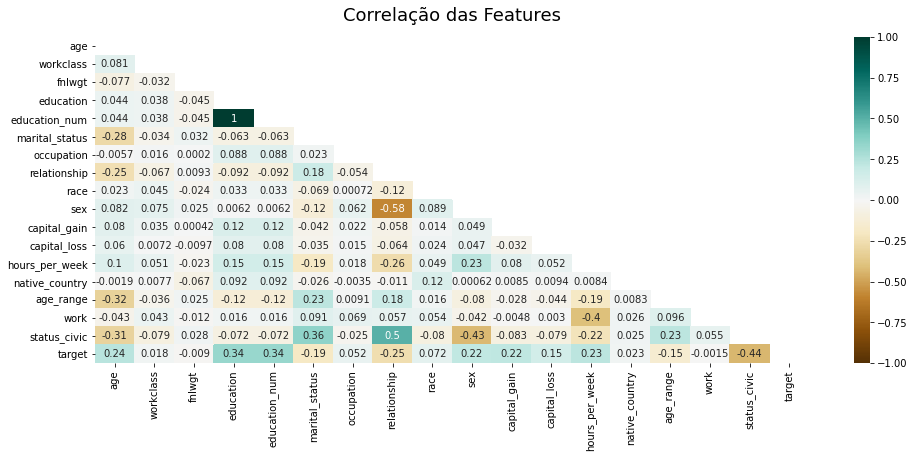

In [27]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df_train.corr(), dtype=np.bool))
heatmap = sns.heatmap(df_train.corr(), mask=mask, vmin=1, vmax=-1, annot=True, cmap='BrBG')
heatmap.set_title('Correlação das Features', fontdict={'fontsize':18}, pad=16);

**Verificando as features existente nos dados e as concluões que chegamos são:**

1. O que nos impressionou foi o workclass e occupation não terem uma correlação sginificativa com a target, esperavamos que o tipo de organização e tipo de função do individuo influencia-se seu ganho por ano;


2. A feature **fnlwgt** como mencionad para além de ter um valor unico para um registo, tem uma correlção baixa com a target;


3. Das features criadas somente a feature status_civic tem uma correlação superior a feature que a originou marital_status. Desta forma, é a única que deve ser preservada das 3 features criadas e a marital_status deletamos;


4. Iremos usar as features que tem uma correlação igual ou superir a 15% com a target. Desta forma, das 18 features só iremos utilizar 8 dessas e a target para criar modelos as seguintes features:

   - age
   - education
   - relationship
   - sex
   - capital_gain
   - capital_loss
   - hours_per_week
   - status_civic
   - **target**
   
   
   **No entanto**, fizemos teste estatístico para ver se essa corelação era significativa no notebook sobre análise dos dados a partir do **p-value**. Consequentemente das 8 features duas (sex e relationship) delas não rejeitasse a hipotese nula, logo elas não tem uma probabilidade de significância com a target. Acabamos por ficar com :
   
   - age
   - education
   - capital_gain
   - capital_loss
   - hours_per_week
   - status_civic
   - **target**




In [28]:
def deleteFeatures(df, lista):
    for i in lista:
        df = df.drop(columns=[i])
    return df

In [29]:
lista = ['fnlwgt','native_country','workclass','occupation','sex','education_num','relationship','race','marital_status','work','age_range']
#lista = ['fnlwgt','native_country','workclass','occupation','education_num','race','marital_status','work','age_range']

df_train = deleteFeatures(df_train,lista)
df_test  = deleteFeatures(df_test,lista)

In [30]:
df_train.columns

Index(['age', 'education', 'capital_gain', 'capital_loss', 'hours_per_week',
       'status_civic', 'target'],
      dtype='object')

# Normalizar

In [31]:
df_train.describe()

,age,education,capital_gain,capital_loss,hours_per_week,status_civic,target
count,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,10.121312,1092.007858,88.372489,40.931238,0.520721,0.248922
std,13.134665,2.549995,7406.346497,404.298370,11.979984,0.499579,0.432396
min,17.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000,0.000000,0.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000,1.000000,0.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000,1.000000,0.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000,1.000000,1.000000


##### Dados distribuição

Nota-se um uma despradonização entre dos valores das features, em especial as variaveis capital_gain e capital_loss. Se olharmos essas duas features veremos que o desvio padrão delas em relação as demais contem um diferença muito grande. É aconselhavel aqui uma normalização dos dados.

In [32]:
# Salvar o pickle do scaler das features
def normalizeSave(df):
    target = df.target
    df = df.drop(columns=['target'])
    scaler = MinMaxScaler(clip=True)
    scaler.fit(df)
    X_train_scaled = scaler.transform(df)
    pickle.dump(scaler,open("scaler.pkl",'wb'))
    columns = ["age","education","capital_gain","capital_loss","hours_per_week","status_civic"]
    df_result = pd.DataFrame(X_train_scaled, columns=columns)
  
    return df_result


In [33]:
def normalize(df):
    target = df.target
    df = df.drop(columns=['target'])
    scaler = MinMaxScaler()
    for i in df.columns:
        df[[i]] = scaler.fit_transform(df[[i]])
    df['target'] = target
    return df

In [34]:
df_normalize = normalize(df_train)
df_normalize_test = normalize(df_test)

# Resultado 
Como resultado deste notebook iremos salvar os dataset de treino e teste já com o tratamento dos dados e outros dois datasets para além do tratamento eles estão com os dados normalizados.

#### Dataset Tratado 
Os dataset com o tratamento feitos nesse notebook.

In [35]:
df_train.to_csv('./Output/df_train.csv',index=False)
df_test.to_csv('./Output/df_test.csv',index=False)

#### Dataset Normalizado 
Os dataset com o tratamento e normalização dos dados feitos nesse notebook.

In [36]:
df_normalize.to_csv('./Output/train_normalize.csv',index=False)
df_normalize_test.to_csv('./Output/test_normalize.csv',index=False)